Задания:

1. Повторение: сгенерировать вектор-столбцы $x_{n*1}$ и $y_{n*1}$ для функции $y=2x+3+err$, где $err_{n*1}$ - нормально распределенная ошибка, сделать $n=1000$ точек $x \in [0; 2]$. Написать функцию `fit` для градиентного спуска. Посмотреть, при всех ли размерах данных будет корректно работать функция с параметром `lr ~ 1e-3`. Если нет, модифицировать ее так, чтобы работала.
2. Добавить в функцию градиентного спуска вывод функции потерь равномерно 10 раз за время обучения.
3. Написать аналогичным образом функцию `fit_sgd` для стохастического градиентного спуска
4. Написать аналогичным образом функцию `fit_mbgd` для мини-батчевого стохастического градиентного спуска
5. Написать класс `LinearRegression` с функциями `fit` и `predict` с минибатчевым градиентным спуском
6. Сгенерировать вектор-столбцы $x_{n*1}$ и $y_{n*1}$ для функции $y=\sin x+err$, где $err_{n*1}$ - нормально распределенная ошибка и $x \in [0; \pi]$. Посмотреть результат применения линейной регрессии
7. Добавить в матрицу признаков столбец, равный $x^2$ и посмотреть результат в новом пространстве признаков ($x$, $x^2$)
8. Написать функцию `poly_transform`, которая преобразует матрицу, добавляя в нее от второй до $p$ степени столбцов и, возможно, столбец единиц (по умолчанию, не добавляет). Посмотреть результаты для функции $y=\sin x+err$, где $err_{n*1}$ - нормально распределенная ошибка и $x \in [0; \pi]$, применяя написанную функцию для $p=3$, $p=4$ и $p=10$
9. Сделать нормализацию данных (написать функцию `normalize_transform`) и подобрать параметры, чтобы полученная кривая хорошо описывала данные при $p=10$
10. Обучить модель на 7 точках $x \in [0; 2\pi]$ с матрицей, расширенной сначала до 10 степени, затем до 25 степени, и предсказать на других данных из 100+ точек. Здесь есть большая вероятность получить переобучение.

### 1.

Повторение: сгенерировать вектор-столбцы $x_{n*1}$ и $y_{n*1}$ для функции $y=2x+3+err$, где $err_{n*1}$ - нормально распределенная ошибка, сделать $n=1000$ точек $x \in [0; 2]$. Написать функцию `fit(x, y, num_iter, lr)` для градиентного спуска. Посмотреть, при всех ли размерах данных $n$ будет корректно работать функция с параметром `lr ~ 1e-3`. Если нет, модифицировать ее так, чтобы работала.

[[2.00062456]
 [3.00025024]]


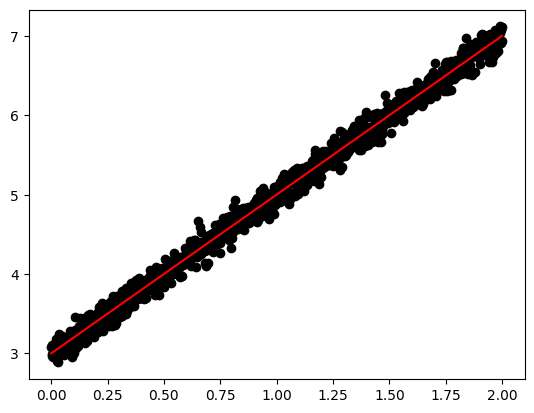

In [ ]:
#Сначала идет деф или нет?

import numpy as np
import matplotlib.pyplot as plt

def fit(x, y, num_iter=1000, lr=1e-3):
    w = np.zeros((x.shape[1], 1)) #dve stroki. odin stolbec
    for i in range(num_iter):
        w -= x.T @ (x @ w - y) * lr / x.shape[0] #zachem normirovat
    return w

n = 1000
err = np.random.normal(loc=0.0, scale=0.1, size=(n, 1)) #ya zabыla, chto eto v sckobkax
x = np.linspace(0, 2, n).reshape(-1, 1)
y = 2 * x + 3 + err
x = np.append(x,  np.ones((n, 1)), axis=1)
#print(x.shape) 1000 na 2
#print(w.shape) 2 (x.shape[1]) na 1

w = fit(x, y, num_iter=100000, lr=1e-3)
print(w)

plt.scatter(x[:, 0], y, color='black')
plt.plot(x[:, 0], x @ w, 'r')

plt.show()

### 2.

Добавить в функцию градиентного спуска вывод лосса равномерно 10 раз за время обучения.

iter: 0, loss: 26227.353320222574
iter: 10000, loss: 17.692267531550634
iter: 20000, loss: 10.830918957615825
iter: 30000, loss: 10.510255775719683
iter: 40000, loss: 10.495269672752347
iter: 50000, loss: 10.49456930147548
iter: 60000, loss: 10.494536569822255
iter: 70000, loss: 10.49453504011772
iter: 80000, loss: 10.494534968627411
iter: 90000, loss: 10.494534965286329
[[1.9957171 ]
 [3.00434993]]


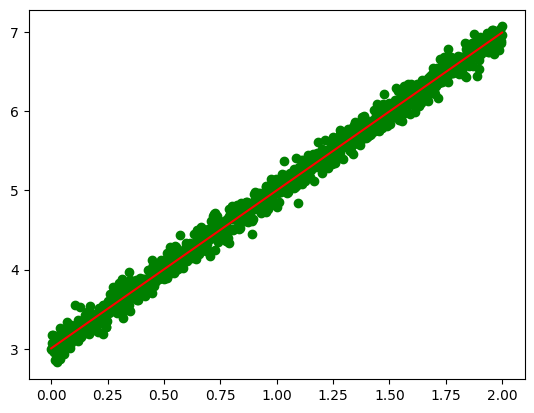

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def loss(x, y, w):
    return ((x @ w - y).T @ (x @ w - y))[0][0] #1xn nx1



def fit(x, y, num_iter = 1000, lr = 1e-3):
    w = np.zeros((x.shape[1], 1))
    for i in range(num_iter):
        w -= x.T @ (x @ w - y) * lr / x.shape[0]
        if i % (num_iter // 10) == 0: #num_iter = 800; 0 80 160 240 320 400 480 560 640 720
            print (f'iter: {i}, loss: {loss(x, y, w)}')
    return w

n = 1000
err = np.random.normal(loc = 0.0, scale = 0.1, size = (n, 1))
x = np.linspace(0, 2, n).reshape(-1, 1)
y = 2 * x + 3 + err
x = np.append(x,  np.ones((n, 1)), axis = 1)

w = fit(x, y, num_iter = 100000, lr = 1e-3)
print(w)

plt.scatter(x[:, 0], y, color='g')
plt.plot(x[:, 0], x @ w, 'r')

plt.show()

### 3.

Написать аналогичным образом функцию `fit_sgd` для стохастического градиентного спуска

iter: 0, loss: 26244.135128094935
iter: 1000, loss: 450.9371014257127
iter: 2000, loss: 94.81387497036462
iter: 3000, loss: 69.20162229688846
iter: 4000, loss: 53.35048016305532
iter: 5000, loss: 41.71985425588538
iter: 6000, loss: 33.158499511722304
iter: 7000, loss: 26.856098537851214
iter: 8000, loss: 22.216611296720515
iter: 9000, loss: 18.801271284933367
[[2.14345767]
 [2.83214497]]


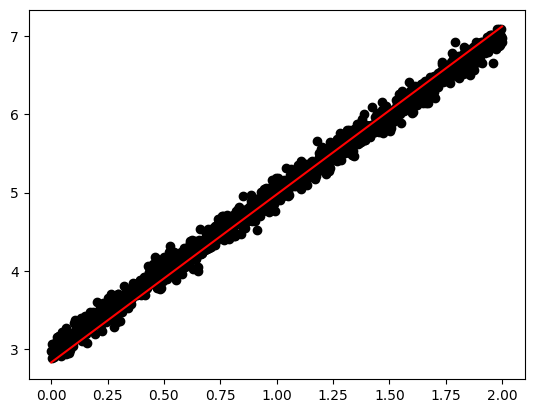

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sgd_fit(x, y, num_iter=1000, lr=1e-3):
    w = np.zeros((2, 1))
    for i in range(num_iter):
        order = np.random.permutation(x.shape[0]) #posledovatelnost` indexov
        for j in order:
            #print(x[[j]].shape)
            #print(y[[j]].shape)
            #print(w.shape)
            w -= x[[j]].T @ (x[[j]] @ w - y[[j]]) * lr
    return w

n = 1000
err = np.random.normal(loc = 0.0, scale = 0.1, size = (n, 1))
x = np.linspace(0, 2, n).reshape(-1, 1)
y = 2 * x + 3 + err
x = np.append(x,  np.ones((n, 1)), axis = 1)
#print(x.shape) 1000 na 2
#print(w.shape) 2 (x.shape[1]) na 1

w = fit(x, y, num_iter = 10000, lr = 1e-3)
print(w)

plt.scatter(x[:, 0], y, color='black')
plt.plot(x[:, 0], x @ w, 'r')

plt.show()

### 4.

Написать аналогичным образом функцию `fit_mbgd` для мини-батчевого стохастического градиентного спуска

In [ ]:
def mbgd_fit(x, y, num_iter=1000, lr=1e-3, batch_size=10):
    w = np.zeros((2, 1))
    for i in range(num_iter):
        order = np.random.permutation(x.shape[0])
        #print(order)
        for start_index in range(0, len(order), batch_size):
            batch_indexes = order[start_index : start_index + batch_size]
            #print(batch_indexes)
            x_batch = x[batch_indexes]
            y_batch = y[batch_indexes]

            w -= x_batch.T @ (x_batch @ w - y_batch) * lr / batch_size

    return w
n = 1000
err = np.random.normal(loc = 0.0, scale = 0.1, size = (n, 1))
x = np.linspace(0, 2, n).reshape(-1, 1)
y = 2 * x + 3 + err
x = np.append(x,  np.ones((n, 1)), axis = 1)

w =  mbgd_fit(x, y, num_iter=1, lr=10e-3, batch_size=10)

### 5.

Написать класс `LinearRegression` с функциями `fit` и `predict` с минибатчевым градиентным спуском

In [ ]:
class LinearRegression:
    def __init__(self, fit_intercept=True):
        self.w = None
        self.fit_intercept = fit_intercept

    def fit(self, x, y, num_iter=1000, lr=1e-3):
        if self.fit_intercept:
            x = np.append(np.ones((x.shape[0], 1)), x, axis=1)
        self.w = np.zeros((x.shape[1], 1))
        alpha = lr / x.shape[0]
        for i in range(num_iter):
            self.w -= x.T @ (x @ self.w - y) * alpha

    def predict(self, x):
        if self.fit_intercept:
            x = np.append(np.ones((x.shape[0], 1)), x, axis=1)
        return x @ self.w

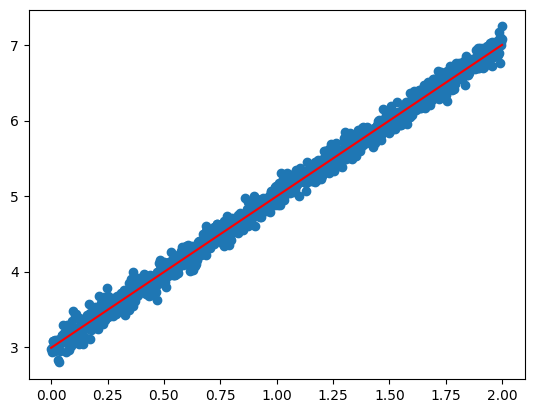

In [ ]:
n = 1000
err = np.random.normal(loc = 0.0, scale = 0.1, size = (n, 1))
x = np.linspace(0, 2, n).reshape(-1, 1)
y = 2 * x + 3 + err

model = LinearRegression()
model.fit(x, y, num_iter=100000)
pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, pred, "r")

In [ ]:
class LinearRegression:
    def __init__(self, fit_intercept=True):
        self.w = None
        self.fit_intercept = fit_intercept

    def loss(self, x, y):
        return ((x @ self.w - y).T @ (x @ self.w - y))[0][0]

    def fit(self, x, y, num_iter=1000, lr=1e-3, batch_size=20):
        if self.fit_intercept:
            x = np.append(np.ones((x.shape[0], 1)), x, axis=1)
        self.w = np.zeros((x.shape[1], 1))
        alpha = lr / batch_size
        for i in range(num_iter):
            if i % (num_iter // 10) == 0:
                print(f"Iteration: {i}, loss: {self.loss(x, y)}")
            order = np.random.permutation(x.shape[0])
            for start_index in range(0, len(order), batch_size):
                batch_indexes = order[start_index: start_index + batch_size]
                x_batch = x[batch_indexes]
                y_batch = y[batch_indexes]
                self.w -= x_batch.T @ (x_batch @ self.w - y_batch) * alpha

    def predict(self, x):
        if self.fit_intercept:
            x = np.append(np.ones((x.shape[0], 1)), x, axis=1)
        return x @ self.w

In [ ]:
model = LinearRegression()
model.fit(x, y, num_iter=20000)
pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, pred, "r")

NameError: name 'self' is not defined

In [ ]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(x, y)
# pred = model.predict(x)

# plt.scatter(x, y)
# plt.plot(x, pred, "r")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

### 6.

Сгенерировать вектор-столбцы $x_{n*1}$ и $y_{n*1}$ для функции $y=\sin x+err$, где $err_{n*1}$ - нормально распределенная ошибка и $x \in [0; \pi]$. Посмотреть результат применения линейной регрессии

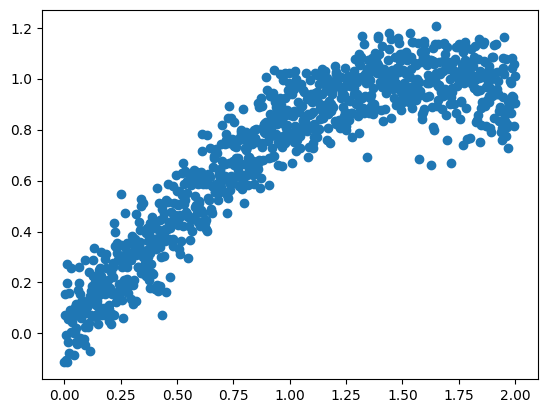

In [ ]:
n = 1000
err = np.random.normal(loc = 0.0, scale = 0.1, size = (n, 1))
x = np.linspace(0, 2, n).reshape(-1, 1)
y = np.sin(x) + err
plt.scatter(x, y)

In [ ]:
model = LinearRegression()
model.fit(x, y)
pred = model.predict(x)

Iteration: 0, loss: 604.6026179045126
Iteration: 100, loss: 22.904185244912316
Iteration: 200, loss: 22.231494222400627
Iteration: 300, loss: 22.086059581369764
Iteration: 400, loss: 22.054611861886876
Iteration: 500, loss: 22.04780662934128
Iteration: 600, loss: 22.04633607090372
Iteration: 700, loss: 22.046015571547095
Iteration: 800, loss: 22.04594588493036
Iteration: 900, loss: 22.045930588595482


Iteration: 0, loss: 604.6026179045126
Iteration: 100, loss: 22.90363222814485
Iteration: 200, loss: 22.23137836366642
Iteration: 300, loss: 22.08602345396155
Iteration: 400, loss: 22.054603059360694
Iteration: 500, loss: 22.04780613737503
Iteration: 600, loss: 22.046334288481198
Iteration: 700, loss: 22.046014794392704
Iteration: 800, loss: 22.045946943807
Iteration: 900, loss: 22.045932587683733


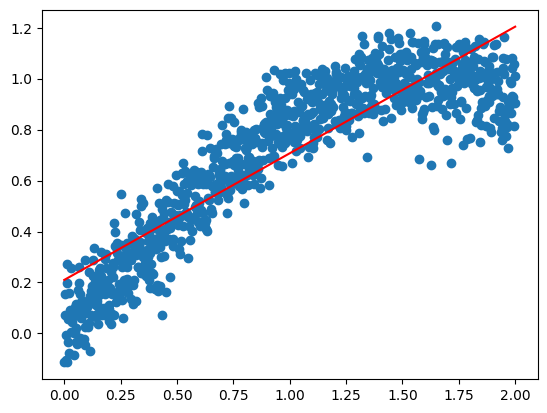

In [ ]:
model = LinearRegression()
model.fit(x, y)
pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, pred, "r")

### 7.

Добавить в матрицу признаков столбец, равный $x^2$ и посмотреть результат в новом пространстве признаков ($x$, $x^2$)

In [ ]:
n = 1000
err = np.random.normal(loc = 0.0, scale = 0.1, size = (n, 1))
x = np.linspace(0, 2, n).reshape(-1, 1)
y = np.sin(x) + err

x = np.append(x, x ** 2, axis=1)
x

array([[0.00000000e+00, 0.00000000e+00],
       [2.00200200e-03, 4.00801202e-06],
       [4.00400400e-03, 1.60320481e-05],
       ...,
       [1.99599600e+00, 3.98400002e+00],
       [1.99799800e+00, 3.99199600e+00],
       [2.00000000e+00, 4.00000000e+00]])

Iteration: 0, loss: 614.745798768943
Iteration: 1000, loss: 14.91672572927969
Iteration: 2000, loss: 10.478205280388432
Iteration: 3000, loss: 9.522237527263337
Iteration: 4000, loss: 9.316372766450053
Iteration: 5000, loss: 9.272031316011534
Iteration: 6000, loss: 9.262479594735408
Iteration: 7000, loss: 9.260424862875372
Iteration: 8000, loss: 9.259983277375975
Iteration: 9000, loss: 9.25988931365992


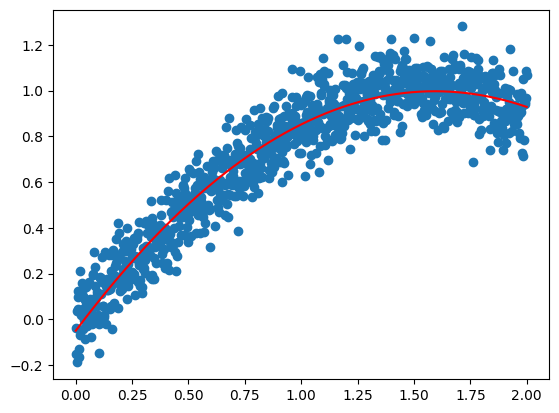

In [ ]:
model = LinearRegression()
model.fit(x, y, num_iter=10000)
pred = model.predict(x)

plt.scatter(x[:, 0], y)
plt.plot(x[:, 0], pred, "r")

In [ ]:
s = "abcdec"
print(s.count("c"))

2


### 8.

Написать функцию `poly_transform`, которая преобразует матрицу, добавляя в нее от второй до $p$ степени столбцов и, возможно, столбец единиц (по умолчанию, не добавляет). Посмотреть результаты для функции $y=\sin x+err$, где $err_{n*1}$ - нормально распределенная ошибка и $x \in [0; \pi]$, применяя написанную функцию для $p=3$, $p=4$ и $p=10$

In [ ]:
def poly_transform(x, p=3):
    x_ = x.copy()
    for i in range(2, p+1):
        x = np.append(x, x_ ** i, axis=1)
    return x

n = 1000
err = np.random.normal(loc = 0.0, scale = 0.1, size = (n, 1))
x = np.linspace(0, 2, n).reshape(-1, 1)
y = np.sin(x) + err

poly_transform(x, 5).shape

(1000, 5)

Iteration: 0, loss: 606.2341685275976
Iteration: 100, loss: 23.073309372356707
Iteration: 200, loss: 17.850213852309942
Iteration: 300, loss: 14.955726665038057
Iteration: 400, loss: 13.292858829586383
Iteration: 500, loss: 12.335586817742826
Iteration: 600, loss: 11.783176296835483
Iteration: 700, loss: 11.462369337622446
Iteration: 800, loss: 11.274705114212146
Iteration: 900, loss: 11.163382885311876


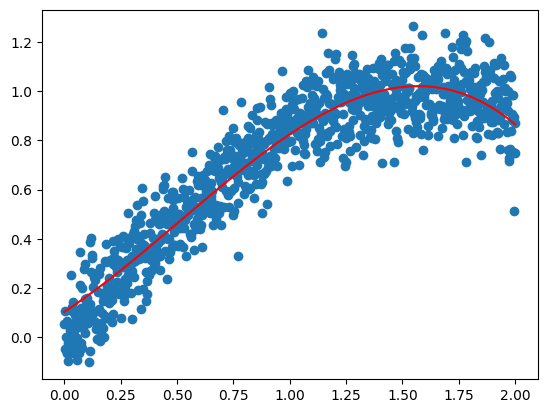

In [ ]:
n = 1000
err = np.random.normal(loc = 0.0, scale = 0.1, size = (n, 1))
x = np.linspace(0, 2, n).reshape(-1, 1)
y = np.sin(x) + err
x = poly_transform(x, 3)

model = LinearRegression()
model.fit(x, y)
pred = model.predict(x)

plt.scatter(x[:, 0], y)
plt.plot(x[:, 0], pred, "r")

Iteration: 0, loss: 600.609973751767
Iteration: 1000, loss: 12.786574466073803
Iteration: 2000, loss: 11.635249534875726
Iteration: 3000, loss: 11.019388318948122
Iteration: 4000, loss: 10.68796004862871
Iteration: 5000, loss: 10.512659354699418
Iteration: 6000, loss: 10.414496400246527
Iteration: 7000, loss: 10.362725416310488
Iteration: 8000, loss: 10.333422050859332
Iteration: 9000, loss: 10.345512663364756


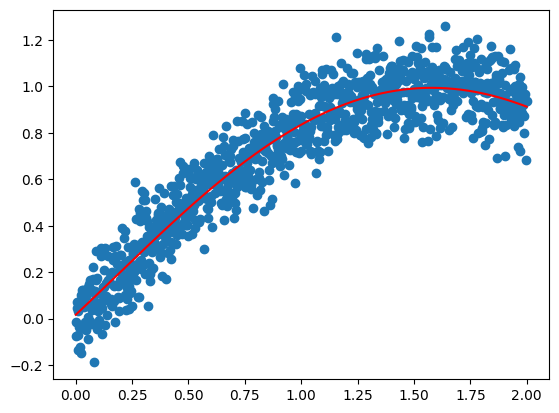

In [ ]:
n = 1000
err = np.random.normal(loc = 0.0, scale = 0.1, size = (n, 1))
x = np.linspace(0, 2, n).reshape(-1, 1)
y = np.sin(x) + err
x = poly_transform(x, 4)

model = LinearRegression()
model.fit(x, y, num_iter=10000)
pred = model.predict(x)

plt.scatter(x[:, 0], y)
plt.plot(x[:, 0], pred, "r")

Iteration: 0, loss: 603.4488303667783
Iteration: 1000, loss: 11.181179675970812
Iteration: 2000, loss: 10.46136014398426
Iteration: 3000, loss: 10.467757467789141
Iteration: 4000, loss: 10.258752193842781
Iteration: 5000, loss: 10.068116258224538
Iteration: 6000, loss: 10.063586284882318
Iteration: 7000, loss: 9.895645546291341
Iteration: 8000, loss: 9.856311908878245
Iteration: 9000, loss: 9.8412278742862


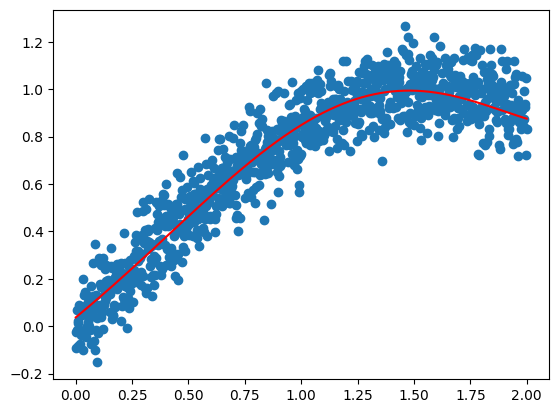

In [ ]:
n = 1000
err = np.random.normal(loc = 0.0, scale = 0.1, size = (n, 1))
x = np.linspace(0, 2, n).reshape(-1, 1)
y = np.sin(x) + err
x = poly_transform(x, 6)

model = LinearRegression()
model.fit(x, y, num_iter=10000)
pred = model.predict(x)

plt.scatter(x[:, 0], y)
plt.plot(x[:, 0], pred, "r")

Iteration: 0, loss: 609.3342847347158
Iteration: 1, loss: 481319177851.35223
Iteration: 2, loss: 4.243165251994702e+19
Iteration: 3, loss: 3.4683281943073455e+30
Iteration: 4, loss: 5.760986607024742e+37
Iteration: 5, loss: 2.165942525824156e+46
Iteration: 6, loss: 6.741093964623995e+47
Iteration: 7, loss: 6.09026405834542e+54
Iteration: 8, loss: 3.1307554920520256e+60
Iteration: 9, loss: 2.2171796434192933e+69


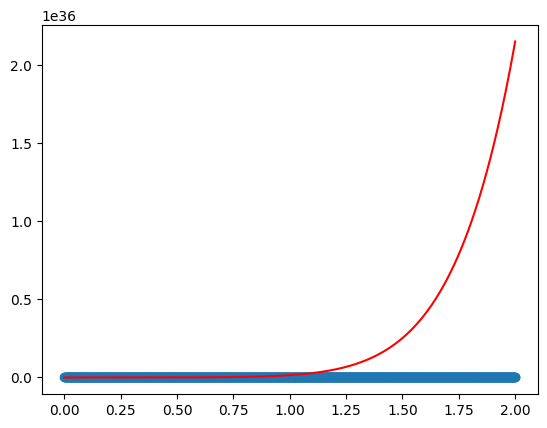

In [ ]:
n = 1000
err = np.random.normal(loc = 0.0, scale = 0.1, size = (n, 1))
x = np.linspace(0, 2, n).reshape(-1, 1)
y = np.sin(x) + err
x = poly_transform(x, 8)

model = LinearRegression()
model.fit(x, y, num_iter=10, lr=5e-4)
pred = model.predict(x)

plt.scatter(x[:, 0], y)
plt.plot(x[:, 0], pred, "r")

In [ ]:
x

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00200200e-03, 4.00801202e-06, 8.02404808e-09, ...,
        6.43853476e-17, 1.28899595e-19, 2.58057247e-22],
       [4.00400400e-03, 1.60320481e-05, 6.41923846e-08, ...,
        4.12066225e-15, 1.64991481e-17, 6.60626552e-20],
       ...,
       [1.99599600e+00, 3.98400002e+00, 7.95204808e+00, ...,
        6.32350687e+01, 1.26216944e+02, 2.51928515e+02],
       [1.99799800e+00, 3.99199600e+00, 7.97600002e+00, ...,
        6.36165763e+01, 1.27105792e+02, 2.53957118e+02],
       [2.00000000e+00, 4.00000000e+00, 8.00000000e+00, ...,
        6.40000000e+01, 1.28000000e+02, 2.56000000e+02]])

### 9.

Сделать нормализацию данных (написать функцию `normalize_transform`) и подобрать параметры, чтобы полученная кривая хорошо описывала данные при $p=10$

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00100100e-03 1.00200300e-06 1.00300601e-09 ... 1.00803612e-24
  1.00904517e-27 1.01005522e-30]
 [2.00200200e-03 4.00801202e-06 8.02404808e-09 ... 2.58057247e-22
  5.16631125e-25 1.03429655e-27]
 ...
 [9.97997998e-01 9.96000004e-01 9.94006010e-01 ... 9.84095760e-01
  9.82125598e-01 9.80159381e-01]
 [9.98998999e-01 9.97999000e-01 9.97000002e-01 ... 9.92019992e-01
  9.91026979e-01 9.90034960e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]
(1000, 10)
Iteration: 0, loss: 609.3342847347158
Iteration: 1000, loss: 17.219122009703913
Iteration: 2000, loss: 14.908887550788288
Iteration: 3000, loss: 13.632574612220576
Iteration: 4000, loss: 12.706339379814032
Iteration: 5000, loss: 12.028950837594053
Iteration: 6000, loss: 11.533363298507604
Iteration: 7000, loss: 11.170673946937919
Iteration: 8000, loss: 10.905150520986787
Iteration: 9000

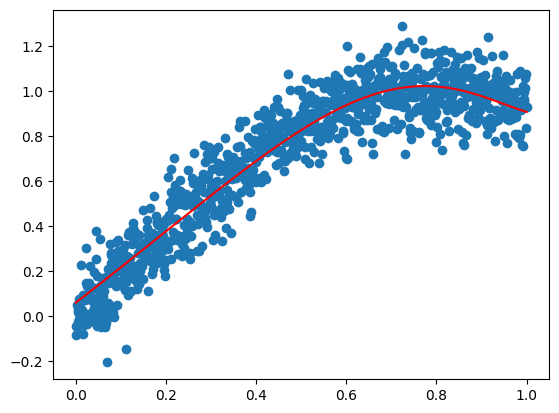

In [ ]:
def normalize_transform(x):
  return (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

x = np.linspace(0, np.pi, n).reshape(-1, 1)
x = poly_transform(x, p=10)
x = normalize_transform(x)
print(x)
print(x.shape)


model = LinearRegression()
model.fit(x, y, num_iter=10000)
pred = model.predict(x)

plt.scatter(x[:, 0], y)
plt.plot(x[:, 0], pred, 'r')


### 10.

Обучить модель на 7 точках $x \in [0; 2\pi]$ с матрицей, расширенной до 10 степени, и предсказать на других данных из 100+ точек. Здесь есть большая вероятность получить переобучение.

(7, 20) (7, 1) (1000, 20) (1000, 1)
Iteration: 0, loss: 3.780832241994135
Iteration: 100000, loss: 0.31017292853249134
Iteration: 200000, loss: 0.2790613562433441
Iteration: 300000, loss: 0.25892717233421675
Iteration: 400000, loss: 0.24472627498017724
Iteration: 500000, loss: 0.23429802772613648
Iteration: 600000, loss: 0.22627905850827335
Iteration: 700000, loss: 0.21980831742350876
Iteration: 800000, loss: 0.2143418114159517
Iteration: 900000, loss: 0.2095356722160775


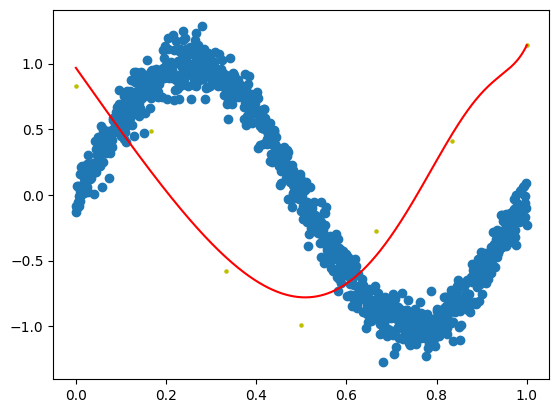

In [ ]:
x_train = np.linspace(0, 2 * np.pi, 7).reshape(-1, 1)
y_train = (np.cos(x_train) + np.random.normal(0, 0.1, size=(7, 1))).reshape(-1, 1)
x_train = normalize_transform(poly_transform(x_train, p=20))

x_test = np.linspace(0, 2 * np.pi, 1000).reshape(-1, 1)
y_test = (np.sin(x_test) + np.random.normal(0, 0.1, size=(1000, 1))).reshape(-1, 1)
x_test = normalize_transform(poly_transform(x_test, p=20))

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
model = LinearRegression()
model.fit(x_train, y_train, num_iter=1000000, lr=1e-2)
pred = model.predict(x_test)

plt.scatter(x_test[:, 0], y_test)
plt.plot(x_test[:, 0], pred, 'r')
plt.scatter(x_train[:, 0], y_train, s=5, c='y')